<a href="https://colab.research.google.com/github/alby-beep/Scene-to-text-detection/blob/main/proposed_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!sudo pip install pytesseract
#Checking the installation.
!tesseract --version
import pytesseract
!pip install gTTS
from gtts import gTTS 
import os
from google.colab.patches import cv2_imshow 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from google.colab.patches import cv2_imshow 
from skimage import data,io,filters
from skimage.color import rgb2gray

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


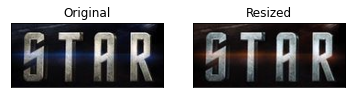

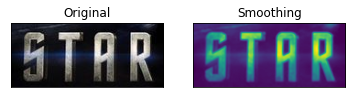

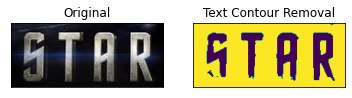

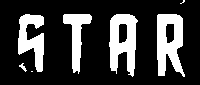

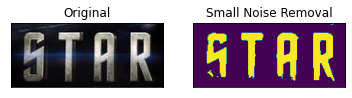

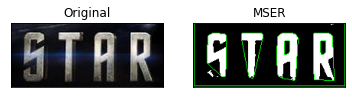

AssertionError: ignored

In [ ]:
from matplotlib import pyplot as plt 
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Load image, grayscale, Otsu's threshold
import PIL
import cv2
from PIL import Image
basewidth = 200
img = Image.open("/content/drive/My Drive/project/used images here/img3/a.png")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/content/drive/My Drive/project/IIIT5K/resized_image.png")
img.show()
img=cv2.imread("/content/drive/My Drive/project/IIIT5K/resized_image.png")
im=Image.open("/content/drive/My Drive/project/used images here/img3/a.png")
display(im, img, 'Original', 'Resized')

#cv2_imshow("/content/drive/My Drive/project/IIIT5K/resized_image.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clah = clahe.apply(gray)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
display(im, blur, 'Original', 'Smoothing')
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
display(im, opening, 'Original', 'Text Contour Removal')

# Find contours and remove small noise
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 50:
        cv2.drawContours(opening, [c], -1, 0, -1)

# Invert and apply slight Gaussian blur
result = 255 - opening
cv2_imshow(result)
img= Image.open("/content/drive/My Drive/project/used images here/img3/a.png")
display(img, result, 'Original', 'Small Noise Removal')
#MSER
mser = cv2.MSER_create()
vis2=cv2.cvtColor(result,cv2.COLOR_GRAY2RGB)
regions, _ = mser.detectRegions(result)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis2, hulls, 1, (0, 255, 0)) 
display(img, vis2, 'Original', 'MSER')
#clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clah = clahe.apply(result)
#cv2_imshow(clah)
#kernel = np.ones((5, 5), np.uint8)
#erosion = cv2.erode(result, kernel, iterations=1)
#img1 = erosion.copy()

#OCR
text = pytesseract.image_to_string(result)
print(text) 

#TTS
 # Language in which you want to convert 
language = 'en'
  
# Passing the text and language to the engine,  
# here we have marked slow=False. Which tells  
# the module that the converted audio should  
# have a high speed 
myobj = gTTS(text=text, lang=language, slow=False) 
  
# Saving the converted audio in a mp3 file named 
# welcome  
myobj.save("/content/drive/My Drive/project/welcome.mp3") 
  
# Playing the converted file 
os.system("mpg321 /content/drive/My Drive/project/welcome.mp3") 

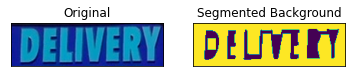

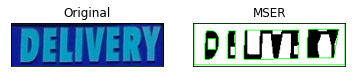

DELIVERY



32512

In [ ]:
from matplotlib import pyplot as plt 
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Load image, grayscale, Otsu's threshold
import PIL
import cv2
from PIL import Image
basewidth = 200
img = Image.open("/content/drive/My Drive/project/IIIT5K/train/30_6.png")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/content/drive/My Drive/project/IIIT5K/resized_image.png")
img.show()
img=cv2.imread("/content/drive/My Drive/project/IIIT5K/resized_image.png")
#cv2_imshow("/content/drive/My Drive/project/IIIT5K/resized_image.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clah = clahe.apply(gray)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(img, sure_bg, 'Original', 'Segmented Background')
#MSER
mser = cv2.MSER_create()
vis2=cv2.cvtColor(sure_bg,cv2.COLOR_GRAY2RGB)
regions, _ = mser.detectRegions(sure_bg)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis2, hulls, 1, (0, 255, 0)) 
display(img, vis2, 'Original', 'MSER')
#clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clah = clahe.apply(result)
#cv2_imshow(clah)
#kernel = np.ones((2, 2), np.uint8)
#erosion = cv2.erode(clah, kernel, iterations=1)
#img1 = erosion.copy()
#cv2_imshow(img1)

#OCR
text = pytesseract.image_to_string(sure_bg)
print(text) 

#TTS
 # Language in which you want to convert 
language = 'en'
  
# Passing the text and language to the engine,  
# here we have marked slow=False. Which tells  
# the module that the converted audio should  
# have a high speed 
myobj = gTTS(text=text, lang=language, slow=False) 
  
# Saving the converted audio in a mp3 file named 
# welcome  
myobj.save("/content/drive/My Drive/project/welcome.mp3") 
  
# Playing the converted file 
os.system("mpg321 /content/drive/My Drive/project/welcome.mp3") 